# Stoke Prediction Dataset 

Data source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset <br>
Data updated date: 2021-01-26

In [2]:
# import libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# make notebook full width for better viewing

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [22]:
df = pd.read_csv(r'data/healthcare-dataset-stroke-data.csv')

In [23]:
# read the first 5 lines of data

df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


In [24]:
print('Number of rows: ', df.shape[0], '\nNumber of columns: ', df.shape[1])
print('Number of \'id\' in this data:', df.id.nunique())

# row count is the same as unique id count, so setting id as index
df = df.set_index('id')

Number of rows:  5110 
Number of columns:  12
Number of 'id' in this data: 5110


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [35]:
for i in df.columns:
    unique_cnt = df[i].nunique()
    print('-----------------------------------------')
    print('Column Name: ',i,'\n-----------------------------------------\nUnique Count of Input:', unique_cnt)
    if unique_cnt < 6:
        print(df[i].value_counts())
    print('\n')

-----------------------------------------
Column Name:  gender 
-----------------------------------------
Unique Count of Input: 3
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


-----------------------------------------
Column Name:  age 
-----------------------------------------
Unique Count of Input: 104


-----------------------------------------
Column Name:  hypertension 
-----------------------------------------
Unique Count of Input: 2
0    4612
1     498
Name: hypertension, dtype: int64


-----------------------------------------
Column Name:  heart_disease 
-----------------------------------------
Unique Count of Input: 2
0    4834
1     276
Name: heart_disease, dtype: int64


-----------------------------------------
Column Name:  ever_married 
-----------------------------------------
Unique Count of Input: 2
Yes    3353
No     1757
Name: ever_married, dtype: int64


-----------------------------------------
Column Name:  work_type 
--------------

In [36]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 1.2 Data descriptions:

Number of rows:  5110 <br>
Number of columns:  11 <br><br>
There are 10 features in this datasets:

| Feature | Data type | Other descriptions | Processing Needed? | Missing Value? |
| ------- | --------- | ------------------ | ----------------- | --------------- |
gender | categorical | Female, Male, Other | T | T |
age | float64 | should be int | T | F |
hypertension | boolean | 0, 1 | F | F |
heart_disease | boolean | 0, 1| F | F |
ever_married | boolean | Yes, No | T | F |
work_type | categorical | Private, Self-employed, children, Govt_job, Never_worked | T | F |
residence_type | categorical | Rural, Urban | T | F |
avg_glucose_level | float64 | | F | F |
bmi | float64 | | F | T |
smoking_status | categorical | never smoked, Unknown, formerly smoked, smokes | T | F |
stroke | boolean | 0, 1 change from int64 to boolean | T | F |

In [40]:
# renaming columns to lower-case 'R' in Residence_type

df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

## 1.2.2 Variances

In [42]:
# categorize data for EDA later
categorical = ['gender', 'work_type', 'residence_type', 'smoking_status']
boolean = ['hypertension', 'heart_disease', 'ever_married', 'stroke']
quant = ['age', 'avg_glucose_level', 'bmi']

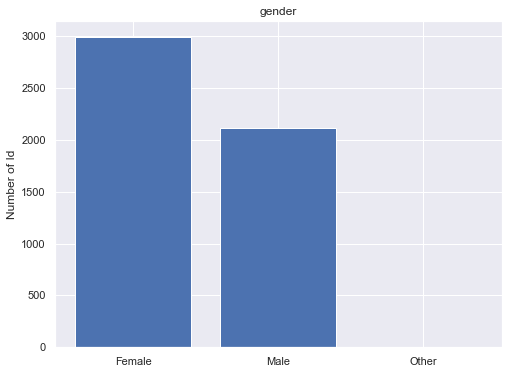

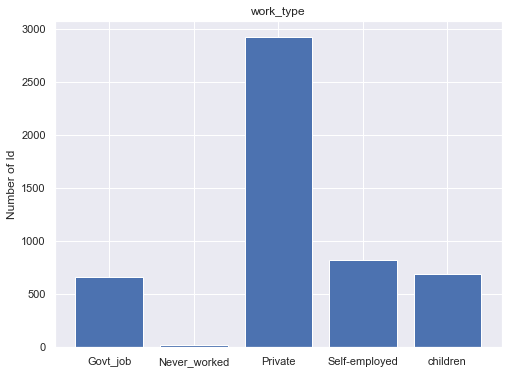

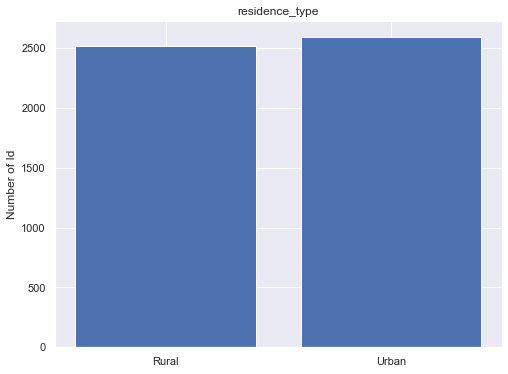

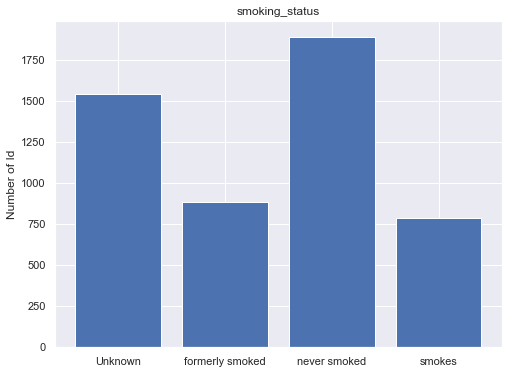

In [56]:
# using seaborn's style
sns.set()

#loop though categorical categories to create bar chart for each categories

for i in categorical:
    df_plot = df.reset_index().groupby(i).agg({'id':'count'})
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(df_plot.index, df_plot['id'])
    ax.set_title(i)
    ax.set_ylabel('Number of Id')
    plt.show()

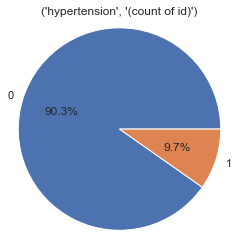

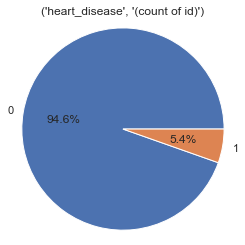

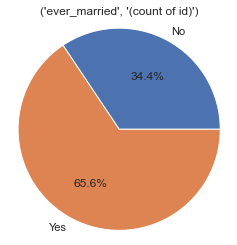

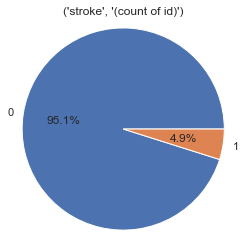

In [62]:
#loop though categorical categories to create pie chart for each boolean

for i in boolean:
    df_plot = df.reset_index().groupby(i).agg({'id':'count'})
    fig, ax = plt.subplots(figsize=(4,4))
    ax.pie(df_plot['id'], labels=df_plot.index, autopct='%1.1f%%')
    ax.set_title((i, '(count of id)'))
    ax.axis('equal')
    plt.show()

In [43]:
# create functions for plotting ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

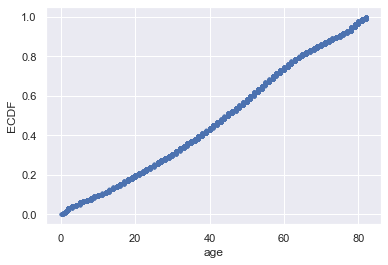

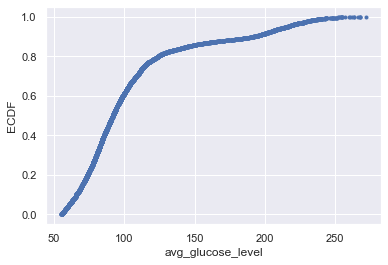

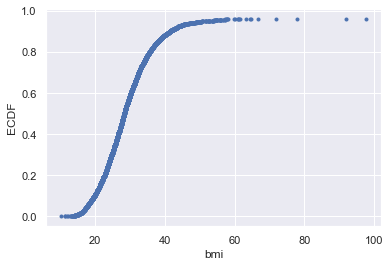

In [63]:
for i in quant:
    x,y = ecdf(df[i])
    _ = plt.plot(x,y, linestyle='none', marker='.')
    _ = plt.xlabel(i)
    _ = plt.ylabel('ECDF')
    plt.show()